In [48]:
#Import general libraries (needed for functions)
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pickle as pk

# Import another script that defines useful functions for the circuit
import mcm_rb_circuits as mcmrb

## Main observations:

1. error bar not Gaussian distributed.
2. My error bar is calculated using the stadard error of the mean, which results in a much smaller error bar than the paper did(standard deviation of 40 measurements), however, When using curve_fit, absolute sigma = True, this gives a similar uncertainty for the error per clifford(EPC) with the paper, this is strange. When I tried to follow the paper by using the standard deviation of the measurements as the error bar, setting absolute_sigma = Frue gives a few times larger uncertainty for EPC, but when setting absolute_sigma = False, the uncertainty for EPC is similar as the values in the paper.
3. Fitted parameters of the paper may not be physical. 

In [49]:
#Loading pickle file

def load_object(filename):
    try:
        with open(filename, "rb") as f:
            return pk.load(f)
    except Exception as ex:
        print("Error during unpickling object (Possibly unsupported):", ex)

In [50]:
config1_data = load_object("exp_config1.pickle")


In [51]:
xvals042622_1 = config1_data[0] # No. of cliffords
rb_res042622_1 = config1_data[1] # Results
fits042622_1 = config1_data[2] # Exponential fitting parameters
lfits042622_1 = config1_data[3] # Linear fitting parameters

In [52]:
print(lfits042622_1['fit_0_0'])

(array([0.00332206, 0.89702143]), array([[1.62456266e-08, 5.13361801e-07],
       [5.13361801e-07, 4.58516565e-05]]))


In [53]:
print(xvals042622_1)

[  0   1   2   3   4   5   7  11  15  22  33  48  70 103 150]


In [54]:
# Function that explores the structure of an data object
def explore_structure(obj, indent=0):
    if isinstance(obj, dict):
        for key, value in obj.items():
            print("  " * indent + f"{key}: {type(value).__name__}")
            explore_structure(value, indent + 1)
    elif isinstance(obj, list):
        print("  " * indent + f"List of {len(obj)} items")
        if obj and isinstance(obj[0], dict):
            explore_structure(obj[0], indent + 1)

print(explore_structure(fits042622_1))

fit_0_0: tuple
fit_0_1: tuple
fit_0_2: tuple
fit_0_3: tuple
fit_0_4: tuple
fit_0_5: tuple
fit_0_6: tuple
fit_0_7: tuple
fit_0_8: tuple
fit_0_9: tuple
fit_0_10: tuple
fit_0_11: tuple
fit_1_0: tuple
fit_1_1: tuple
fit_1_2: tuple
fit_1_3: tuple
fit_1_4: tuple
fit_1_5: tuple
fit_1_6: tuple
fit_1_7: tuple
fit_1_8: tuple
fit_1_9: tuple
fit_1_10: tuple
fit_1_11: tuple
fit_2_0: tuple
fit_2_1: tuple
fit_2_2: tuple
fit_2_3: tuple
fit_2_4: tuple
fit_2_5: tuple
fit_2_6: tuple
fit_2_7: tuple
fit_2_8: tuple
fit_2_9: tuple
fit_2_10: tuple
fit_2_11: tuple
fit_0_12: tuple
fit_0_13: tuple
fit_0_14: tuple
fit_0_15: tuple
fit_0_16: tuple
fit_1_12: tuple
fit_1_13: tuple
fit_1_14: tuple
fit_1_15: tuple
fit_1_16: tuple
fit_2_12: tuple
fit_2_13: tuple
fit_2_14: tuple
fit_2_15: tuple
fit_2_16: tuple
None


In [55]:
print(fits042622_1['fit_0_0'])

(array([0.45944181, 0.97127689, 0.51268881]), array([[ 2.32500694e-04,  1.94878867e-05, -1.96083786e-04],
       [ 1.94878867e-05,  7.35078110e-06, -3.24879447e-05],
       [-1.96083786e-04, -3.24879447e-05,  2.31892655e-04]]))


In [56]:
# The qubit lists that are used to extract the data for the corresponding qubit

rb_q_list1 = sorted([2,5,4,10,13,11,16,17,15,21,24,22])
ancilla_q_list1 = sorted([3,7,14,18,25])

In [57]:
seeds = 40 # No. of Clifford sequences per sequence length
xval = np.insert(np.ceil(np.geomspace(1,150,14)).astype(int),0,0) # x values for the fit

In [58]:
full_q_list_1 = rb_q_list1+ancilla_q_list1

shots = 1024 # No. of shots used for calculating the ground state probability


In [59]:
print(full_q_list_1)

[2, 4, 5, 10, 11, 13, 15, 16, 17, 21, 22, 24, 3, 7, 14, 18, 25]


In [60]:
# extract the required data for plotting

temp_len = len(xvals042622_1)
data_1 = np.zeros([3,len(full_q_list_1),seeds,temp_len])
for exp_ind in range(0,3):
    for i in range(seeds):
        for qn in range(0,len(full_q_list_1)):
            data_1[exp_ind,qn,i,:] = rb_res042622_1['rb_res_%d_%d'%(exp_ind,qn)][i*temp_len:(i+1)*temp_len]

In [61]:
print(data_1.shape)

(3, 17, 40, 15)


[0.44926727 0.96718159 0.51105421]
[0.41226358 0.98517734 0.55376113]
[2.61546097e-06 9.71523078e-01]
[0.24256726 0.98899225 0.75512893]
[2.94556160e-05 9.97586071e-01]
[5.17992986e-05 9.97463681e-01]


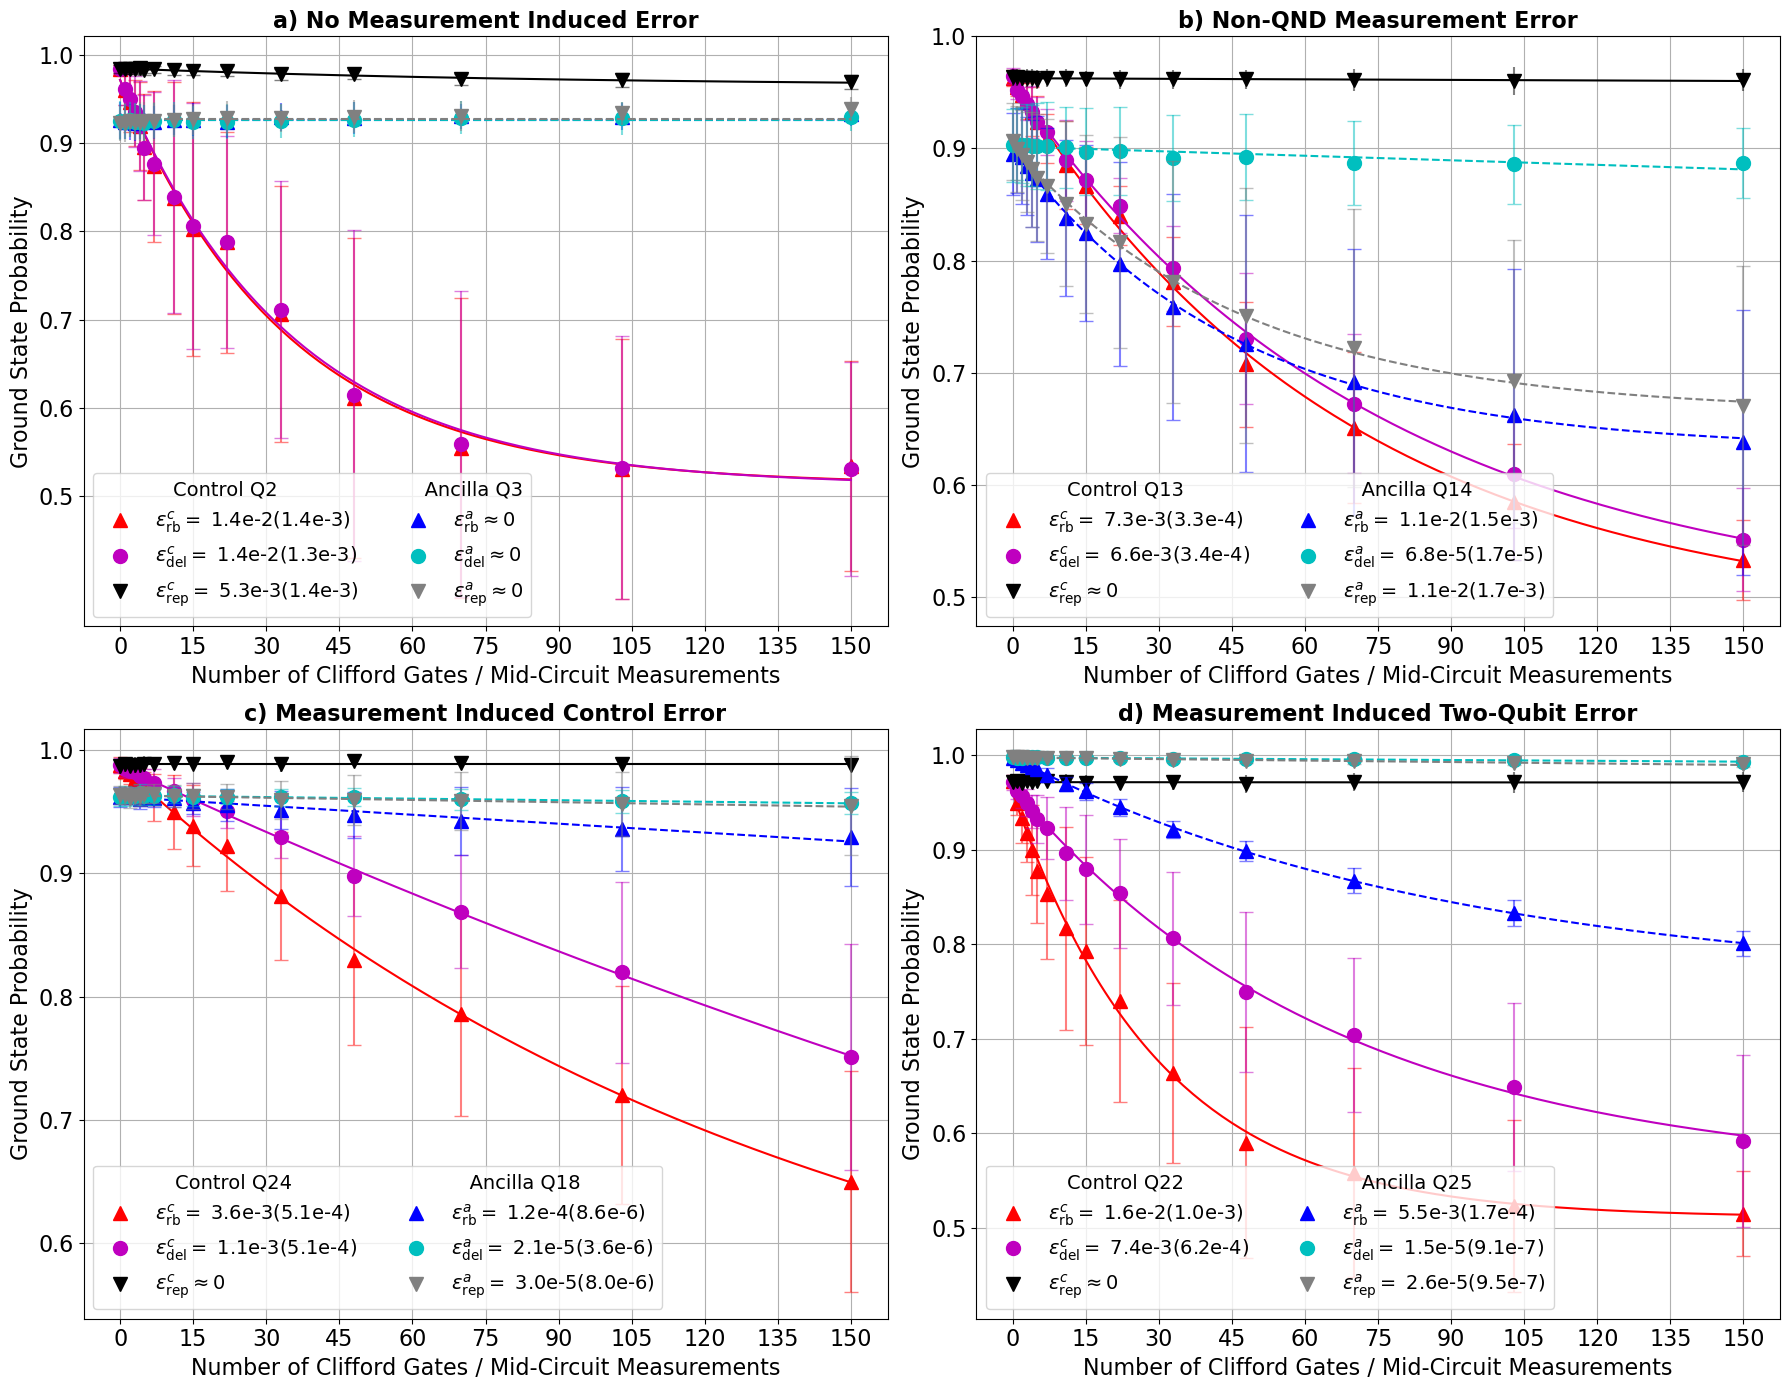

In [62]:
# Plot from the paper

fig, ax = plt.subplots(2,2,figsize=(18,14))


i0 = 0
i1 = 1
fsize = 16
fsizel = 14
msize = 10

# No error

xval = xvals042622_1
fits = fits042622_1
data = data_1
colours = ['r','m','k','b','c','grey']
labels = ['c','a']
markers = ["^","o","v"]
exps = [r'\rm rb',r'\rm del',r'\rm rep']
lstyles = ['-','--','--']

q_list = full_q_list_1
qs = [2,3]

fxval = np.arange(xval[0],xval[-1]+1,1)

for (k, q) in enumerate(qs):
    temp_ind = np.where(np.array(q_list)==q)[0][0]
    for j in range(3):
        
        std_errs = np.sqrt(np.diag(fits['fit_%d_%d'%(j,temp_ind)][1]))
        alpha = fits['fit_%d_%d'%(j,temp_ind)][0][1]
        alpha_err = std_errs[1]
        epc = (1-alpha)/2
        epc_err = 1/2*alpha_err
        
#         print(fits['fit_%d_%d'%(j,temp_ind)][0])
        
        if epc < 1e-8:
            ax[i0,i0].errorbar(xval, np.mean(data[j,temp_ind,:,:],0)/shots,yerr=np.std(data[j,temp_ind,:,:],0)/shots,alpha = 0.5,linestyle='',markersize=msize, marker='',color=colours[3*k+j])
            ax[i0,i0].plot(xval, np.mean(data[j,temp_ind,:,:],0)/shots,linestyle='',markersize=msize, marker=markers[j],color=colours[3*k+j],label= r'$\epsilon^{%s}_{%s} \approx 0$'%(labels[k],exps[j]))
        else:
            ax[i0,i0].errorbar(xval, np.mean(data[j,temp_ind,:,:],0)/shots,yerr=np.std(data[j,temp_ind,:,:],0)/shots,alpha = 0.5,capsize=5,linestyle='',markersize=msize, marker='',color=colours[3*k+j])
            ax[i0,i0].plot(xval, np.mean(data[j,temp_ind,:,:],0)/shots,linestyle='',markersize=msize, marker=markers[j],color=colours[3*k+j],label= format(r'$\epsilon^{%s}_{%s} = $'%(labels[k],exps[j]) +' %.1e(%.1e)'%(epc,epc_err)).replace('e-0','e-'))
    
        ax[i0,i0].plot(fxval, mcmrb.expfunction_alpha(fxval,*fits['fit_%d_%d'%(j,temp_ind)][0]),linestyle=lstyles[k], marker='',color=colours[3*k+j])

leg = ax[i0,i0].legend(ncol = 2,title='Control Q2                        Ancilla Q3',fontsize=fsizel,title_fontsize=fsizel)   
leg._legend_box.align = "right"
# plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
ax[i0,i0].set_ylabel('Ground State Probability',fontsize=fsize)
ax[i0,i0].set_xlabel('Number of Clifford Gates / Mid-Circuit Measurements',fontsize=fsize)
ax[i0,i0].set_title('a) No Measurement Induced Error',fontsize=fsize,fontweight="bold")
ax[i0,i0].set_xticks(range(0,160,15))
ax[i0,i0].set_xticklabels(range(0,160,15),fontsize=fsize)
ax[i0,i0].set_yticks([0.5,0.6,0.7,0.8,0.9,1.0])
ax[i0,i0].set_yticklabels([0.5,0.6,0.7,0.8,0.9,1.0],fontsize=fsize)
ax[i0,i0].grid('minor')

# non-QND

xval = xvals042622_1
data = data_1
colours = ['r','m','k','b','c','grey']
labels = ['c','a']
markers = ["^","o","v"]
exps = [r'\rm rb',r'\rm del',r'\rm rep']
lstyles = ['-','--','--']

q_list = full_q_list_1
# qs = [21,19]
qs = [13,14]

fxval = np.arange(xval[0],xval[-1]+1,1)

expfit = [True, True, False, True, False, True]
epc_limit = 1e-5

for (k, q) in enumerate(qs):
    temp_ind = np.where(np.array(q_list)==q)[0][0]
    for j in range(3):
        
        if expfit[3*k+j]:
            # exponential
            fits = fits042622_1
            std_errs = np.sqrt(np.diag(fits['fit_%d_%d'%(j,temp_ind)][1]))
            alpha = fits['fit_%d_%d'%(j,temp_ind)][0][1]
            alpha_err = std_errs[1]
            epc = (1-alpha)/2
            epc_err = 1/2*alpha_err
            #print(fits['fit_%d_%d'%(j,temp_ind)][0])
            if epc < epc_limit:
                ax[i0,i1].errorbar(xval, np.mean(data[j,temp_ind,:,:],0)/shots,yerr=np.std(data[j,temp_ind,:,:],0)/shots,alpha = 0.5,linestyle='',markersize=msize, marker='',color=colours[3*k+j])
                ax[i0,i1].plot(xval, np.mean(data[j,temp_ind,:,:],0)/shots,linestyle='',markersize=msize, marker=markers[j],color=colours[3*k+j],label= r'$\epsilon^{%s}_{%s} \approx 0$'%(labels[k],exps[j]))
            else:
                ax[i0,i1].errorbar(xval, np.mean(data[j,temp_ind,:,:],0)/shots,yerr=np.std(data[j,temp_ind,:,:],0)/shots,alpha = 0.5,capsize=5,linestyle='',markersize=msize, marker='',color=colours[3*k+j])
                ax[i0,i1].plot(xval, np.mean(data[j,temp_ind,:,:],0)/shots,linestyle='',markersize=msize, marker=markers[j],color=colours[3*k+j],label= format(r'$\epsilon^{%s}_{%s} = $'%(labels[k],exps[j]) +' %.1e(%.1e)'%(epc,epc_err)).replace('e-0','e-'))

            ax[i0,i1].plot(fxval, mcmrb.expfunction_alpha(fxval,*fits['fit_%d_%d'%(j,temp_ind)][0]),linestyle=lstyles[k], marker='',color=colours[3*k+j])
            
        else:
            # linear
            fits = lfits042622_1
            std_errs = np.sqrt(np.diag(fits['fit_%d_%d'%(j,temp_ind)][1]))
            alpha = np.exp(-fits['fit_%d_%d'%(j,temp_ind)][0][0])
            alpha_err = std_errs[0]*alpha
            epc = (1-alpha)/2
            epc_err = 1/2*alpha_err
            #print(fits['fit_%d_%d'%(j,temp_ind)][0])

            if epc < epc_limit:
                ax[i0,i1].errorbar(xval, np.mean(data[j,temp_ind,:,:],0)/shots,yerr=np.std(data[j,temp_ind,:,:],0)/shots,alpha = 0.5,linestyle='',markersize=msize, marker='',color=colours[3*k+j])
                ax[i0,i1].plot(xval, np.mean(data[j,temp_ind,:,:],0)/shots,linestyle='',markersize=msize, marker=markers[j],color=colours[3*k+j],label= r'$\epsilon^{%s}_{%s} \approx 0$'%(labels[k],exps[j]))
            else:
                ax[i0,i1].errorbar(xval, np.mean(data[j,temp_ind,:,:],0)/shots,yerr=np.std(data[j,temp_ind,:,:],0)/shots,alpha = 0.5,capsize=5,linestyle='',markersize=msize, marker='',color=colours[3*k+j])
                ax[i0,i1].plot(xval, np.mean(data[j,temp_ind,:,:],0)/shots,linestyle='',markersize=msize, marker=markers[j],color=colours[3*k+j],label= format(r'$\epsilon^{%s}_{%s} = $'%(labels[k],exps[j]) +' %.1e(%.1e)'%(epc,epc_err)).replace('e-0','e-'))

            ax[i0,i1].plot(fxval, mcmrb.linearfunction(fxval,*fits['fit_%d_%d'%(j,temp_ind)][0]),linestyle=lstyles[k], marker='',color=colours[3*k+j])

ax[i0,i1].legend(loc=3,ncol = 2,title='Control Q13                             Ancilla Q14',fontsize=fsizel,title_fontsize=fsizel)   
# plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
ax[i0,i1].set_ylabel('Ground State Probability',fontsize=fsize)
ax[i0,i1].set_xlabel('Number of Clifford Gates / Mid-Circuit Measurements',fontsize=fsize)
ax[i0,i1].set_title('b) Non-QND Measurement Error',fontsize=fsize,fontweight="bold")
ax[i0,i1].set_xticks(range(0,160,15))
ax[i0,i1].set_xticklabels(range(0,160,15),fontsize=fsize)
ax[i0,i1].set_yticks([0.5,0.6,0.7,0.8,0.9,1.0])
ax[i0,i1].set_yticklabels([0.5,0.6,0.7,0.8,0.9,1.0],fontsize=fsize)
ax[i0,i1].grid('minor')

# Stark

xval = xvals042622_1
data = data_1
colours = ['r','m','k','b','c','grey']
labels = ['c','a']
markers = ["^","o","v"]
exps = [r'\rm rb',r'\rm del',r'\rm rep']
lstyles = ['-','--','--']

q_list = full_q_list_1
# qs = [15,12]
qs = [24,18]

fxval = np.arange(xval[0],xval[-1]+1,1)

expfit = [True, True, False, False, False, False]
epc_limit = 1e-5

for (k, q) in enumerate(qs):
    temp_ind = np.where(np.array(q_list)==q)[0][0]
    for j in range(3):
        
        if expfit[3*k+j]:
            # exponential
            fits = fits042622_1
            std_errs = np.sqrt(np.diag(fits['fit_%d_%d'%(j,temp_ind)][1]))
            alpha = fits['fit_%d_%d'%(j,temp_ind)][0][1]
            alpha_err = std_errs[1]
            epc = (1-alpha)/2
            epc_err = 1/2*alpha_err
            #print(fits['fit_%d_%d'%(j,temp_ind)][0])
            if epc < epc_limit:
                ax[i1,i0].errorbar(xval, np.mean(data[j,temp_ind,:,:],0)/shots,yerr=np.std(data[j,temp_ind,:,:],0)/shots,alpha = 0.5,linestyle='',markersize=msize, marker='',color=colours[3*k+j])
                ax[i1,i0].plot(xval, np.mean(data[j,temp_ind,:,:],0)/shots,linestyle='',markersize=msize, marker=markers[j],color=colours[3*k+j],label= r'$\epsilon^{%s}_{%s} \approx 0$'%(labels[k],exps[j]))
            else:
                ax[i1,i0].errorbar(xval, np.mean(data[j,temp_ind,:,:],0)/shots,yerr=np.std(data[j,temp_ind,:,:],0)/shots,alpha = 0.5,capsize=5,linestyle='',markersize=msize, marker='',color=colours[3*k+j])
                ax[i1,i0].plot(xval, np.mean(data[j,temp_ind,:,:],0)/shots,linestyle='',markersize=msize, marker=markers[j],color=colours[3*k+j],label= format(r'$\epsilon^{%s}_{%s} = $'%(labels[k],exps[j]) +' %.1e(%.1e)'%(epc,epc_err)).replace('e-0','e-'))

            ax[i1,i0].plot(fxval, mcmrb.expfunction_alpha(fxval,*fits['fit_%d_%d'%(j,temp_ind)][0]),linestyle=lstyles[k], marker='',color=colours[3*k+j])
            
        else:
            # linear
            fits = lfits042622_1
            std_errs = np.sqrt(np.diag(fits['fit_%d_%d'%(j,temp_ind)][1]))
            alpha = np.exp(-fits['fit_%d_%d'%(j,temp_ind)][0][0])
            alpha_err = std_errs[0]*alpha
            epc = (1-alpha)/2
            epc_err = 1/2*alpha_err
            #print(fits['fit_%d_%d'%(j,temp_ind)][0])

            if epc < epc_limit:
                ax[i1,i0].errorbar(xval, np.mean(data[j,temp_ind,:,:],0)/shots,yerr=np.std(data[j,temp_ind,:,:],0)/shots,alpha = 0.5,linestyle='',markersize=msize, marker='',color=colours[3*k+j])
                ax[i1,i0].plot(xval, np.mean(data[j,temp_ind,:,:],0)/shots,linestyle='',markersize=msize, marker=markers[j],color=colours[3*k+j],label= r'$\epsilon^{%s}_{%s} \approx 0$'%(labels[k],exps[j]))
            else:
                ax[i1,i0].errorbar(xval, np.mean(data[j,temp_ind,:,:],0)/shots,yerr=np.std(data[j,temp_ind,:,:],0)/shots,alpha = 0.5,capsize=5,linestyle='',markersize=msize, marker='',color=colours[3*k+j])
                ax[i1,i0].plot(xval, np.mean(data[j,temp_ind,:,:],0)/shots,linestyle='',markersize=msize, marker=markers[j],color=colours[3*k+j],label= format(r'$\epsilon^{%s}_{%s} = $'%(labels[k],exps[j]) +' %.1e(%.1e)'%(epc,epc_err)).replace('e-0','e-'))

            ax[i1,i0].plot(fxval, mcmrb.linearfunction(fxval,*fits['fit_%d_%d'%(j,temp_ind)][0]),linestyle=lstyles[k], marker='',color=colours[3*k+j])

ax[i1,i0].legend(ncol = 2,title='Control Q24                             Ancilla Q18',fontsize=fsizel,title_fontsize=fsizel)   
# plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
ax[i1,i0].set_ylabel('Ground State Probability',fontsize=fsize)
ax[i1,i0].set_xlabel('Number of Clifford Gates / Mid-Circuit Measurements',fontsize=fsize)
ax[i1,i0].set_xticks(range(0,160,15))
ax[i1,i0].set_xticklabels(range(0,160,15),fontsize=fsize)
ax[i1,i0].set_yticks([0.6,0.7,0.8,0.9,1.0])
ax[i1,i0].set_yticklabels([0.6,0.7,0.8,0.9,1.0],fontsize=fsize)
ax[i1,i0].grid('minor')
ax[i1,i0].set_title('c) Measurement Induced Control Error',fontsize=fsize,fontweight="bold")


# Collision

xval = xvals042622_1
data = data_1
colours = ['r','m','k','b','c','grey']
labels = ['c','a']
markers = ["^","o","v"]
exps = [r'\rm rb',r'\rm del',r'\rm rep']
lstyles = ['-','--','--']

q_list = full_q_list_1
qs = [22,25]

fxval = np.arange(xval[0],xval[-1]+1,1)

expfit = [True, True, False, True, False, False]
epc_limit = 1e-5

for (k, q) in enumerate(qs):
    temp_ind = np.where(np.array(q_list)==q)[0][0]
    for j in range(3):
        
        if expfit[3*k+j]:
            # exponential
            fits = fits042622_1
            std_errs = np.sqrt(np.diag(fits['fit_%d_%d'%(j,temp_ind)][1]))
            alpha = fits['fit_%d_%d'%(j,temp_ind)][0][1]
            alpha_err = std_errs[1]
            epc = (1-alpha)/2
            epc_err = 1/2*alpha_err
            print(fits['fit_%d_%d'%(j,temp_ind)][0])
            if epc < epc_limit:
                ax[i1,i1].errorbar(xval, np.mean(data[j,temp_ind,:,:],0)/shots,yerr=np.std(data[j,temp_ind,:,:],0)/shots,alpha = 0.5,linestyle='',markersize=msize, marker='',color=colours[3*k+j])
                ax[i1,i1].plot(xval, np.mean(data[j,temp_ind,:,:],0)/shots,linestyle='',markersize=msize, marker=markers[j],color=colours[3*k+j],label= r'$\epsilon^{%s}_{%s} \approx 0$'%(labels[k],exps[j]))
            else:
                ax[i1,i1].errorbar(xval, np.mean(data[j,temp_ind,:,:],0)/shots,yerr=np.std(data[j,temp_ind,:,:],0)/shots,alpha = 0.5,capsize=5,linestyle='',markersize=msize, marker='',color=colours[3*k+j])
                ax[i1,i1].plot(xval, np.mean(data[j,temp_ind,:,:],0)/shots,linestyle='',markersize=msize, marker=markers[j],color=colours[3*k+j],label= format(r'$\epsilon^{%s}_{%s} = $'%(labels[k],exps[j]) +' %.1e(%.1e)'%(epc,epc_err)).replace('e-0','e-'))

                
            ax[i1,i1].plot(fxval, mcmrb.expfunction_alpha(fxval,*fits['fit_%d_%d'%(j,temp_ind)][0]),linestyle=lstyles[k], marker='',color=colours[3*k+j])
            
        else:
            # linear
            fits = lfits042622_1
            std_errs = np.sqrt(np.diag(fits['fit_%d_%d'%(j,temp_ind)][1]))
            alpha = np.exp(-fits['fit_%d_%d'%(j,temp_ind)][0][0])
            alpha_err = std_errs[0]*alpha
            epc = (1-alpha)/2
            epc_err = 1/2*alpha_err
            print(fits['fit_%d_%d'%(j,temp_ind)][0])

            if epc < epc_limit:
                ax[i1,i1].errorbar(xval, np.mean(data[j,temp_ind,:,:],0)/shots,yerr=np.std(data[j,temp_ind,:,:],0)/shots,alpha = 0.5,linestyle='',markersize=msize, marker='',color=colours[3*k+j])
                ax[i1,i1].plot(xval, np.mean(data[j,temp_ind,:,:],0)/shots,linestyle='',markersize=msize, marker=markers[j],color=colours[3*k+j],label= r'$\epsilon^{%s}_{%s} \approx 0$'%(labels[k],exps[j]))
            else:
                ax[i1,i1].errorbar(xval, np.mean(data[j,temp_ind,:,:],0)/shots,yerr=np.std(data[j,temp_ind,:,:],0)/shots,alpha = 0.5,capsize=5,linestyle='',markersize=msize, marker='',color=colours[3*k+j])
                ax[i1,i1].plot(xval, np.mean(data[j,temp_ind,:,:],0)/shots,linestyle='',markersize=msize, marker=markers[j],color=colours[3*k+j],label= format(r'$\epsilon^{%s}_{%s} = $'%(labels[k],exps[j]) +' %.1e(%.1e)'%(epc,epc_err)).replace('e-0','e-'))

            ax[i1,i1].plot(fxval, mcmrb.linearfunction(fxval,*fits['fit_%d_%d'%(j,temp_ind)][0]),linestyle=lstyles[k], marker='',color=colours[3*k+j])


ax[i1,i1].legend(loc=3,ncol = 2,title='Control Q22                             Ancilla Q25',fontsize=fsizel,title_fontsize=fsizel)   
# plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
ax[i1,i1].set_ylabel('Ground State Probability',fontsize=fsize)
ax[i1,i1].set_xlabel('Number of Clifford Gates / Mid-Circuit Measurements',fontsize=fsize)
ax[i1,i1].set_xticks(range(0,160,15))
ax[i1,i1].set_xticklabels(range(0,160,15),fontsize=fsize)
ax[i1,i1].set_yticks([0.5,0.6,0.7,0.8,0.9,1.0])
ax[i1,i1].set_yticklabels([0.5,0.6,0.7,0.8,0.9,1.0],fontsize=fsize)
ax[i1,i1].set_title('d) Measurement Induced Two-Qubit Error',fontsize=fsize,fontweight="bold")
ax[i1,i1].grid('minor')

plt.tight_layout();

# plt.savefig('Plots/All_signatures_042622_linear.pdf',facecolor=(1, 1, 1),bbox_inches='tight')

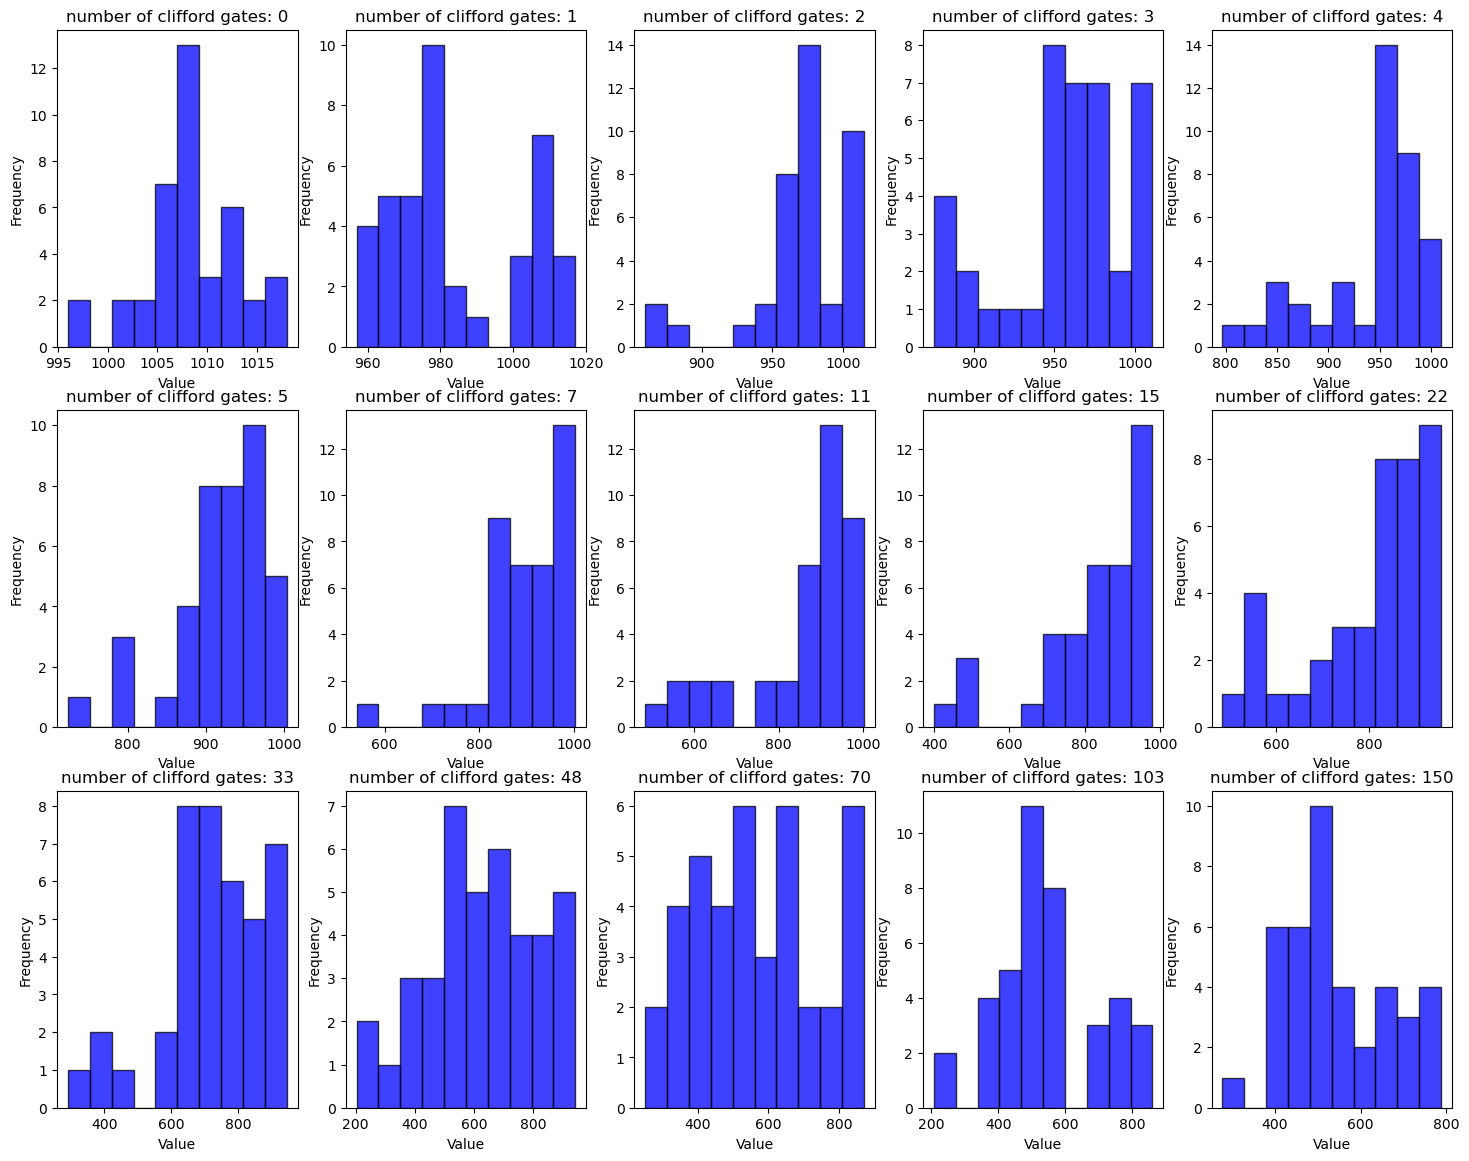

In [63]:
# Distribution of measurements results for the data points of 'epsilon^c_rb' in the 'no measurement induced error plot'

#print(data[0,0,:,:])
fig, axes = plt.subplots(3, 5, figsize=(18, 14))
counter = 0
for i in range(0,3):
    for j in range(0,5):       
        ax = axes[i, j]
        histogram_data = data[0,0,:,counter]
        ax.hist(histogram_data, bins=10, alpha=0.75, color='blue', edgecolor='black')
        ax.set_title('number of clifford gates: %d' % xval[counter])
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')
        counter+=1
        # Show the plot
plt.show()

$\epsilon^{c}_{\rm rb} = $ 1.9e-02(7.9e-04)
epc: 0.018574965988271575
popt: [0.46067309 0.96285007 0.51      ]
$\epsilon^{c}_{\rm del} = $ 6.7e-03(5.9e-04)
epc: 0.006675227877513068
popt: [0.45905804 0.98664954 0.51      ]
$\epsilon^{c}_{\rm rep} = $ 2.6e-06(4.7e-06)
epc: 2.5905841096185434e-06
popt: [5.18118164e-06 9.71653690e-01]
$\epsilon^{a}_{\rm rb} = $ 2.1e-03(1.5e-04)
epc: 0.0020610826061319143
popt: [0.48628975 0.99587783 0.51      ]
$\epsilon^{a}_{\rm del} = $ 1.5e-05(1.1e-06)
epc: 1.5199594900372482e-05
popt: [3.03996519e-05 9.97627591e-01]
$\epsilon^{a}_{\rm rep} = $ 2.7e-05(1.1e-06)
epc: 2.7478765212030076e-05
popt: [5.49590406e-05 9.97601989e-01]


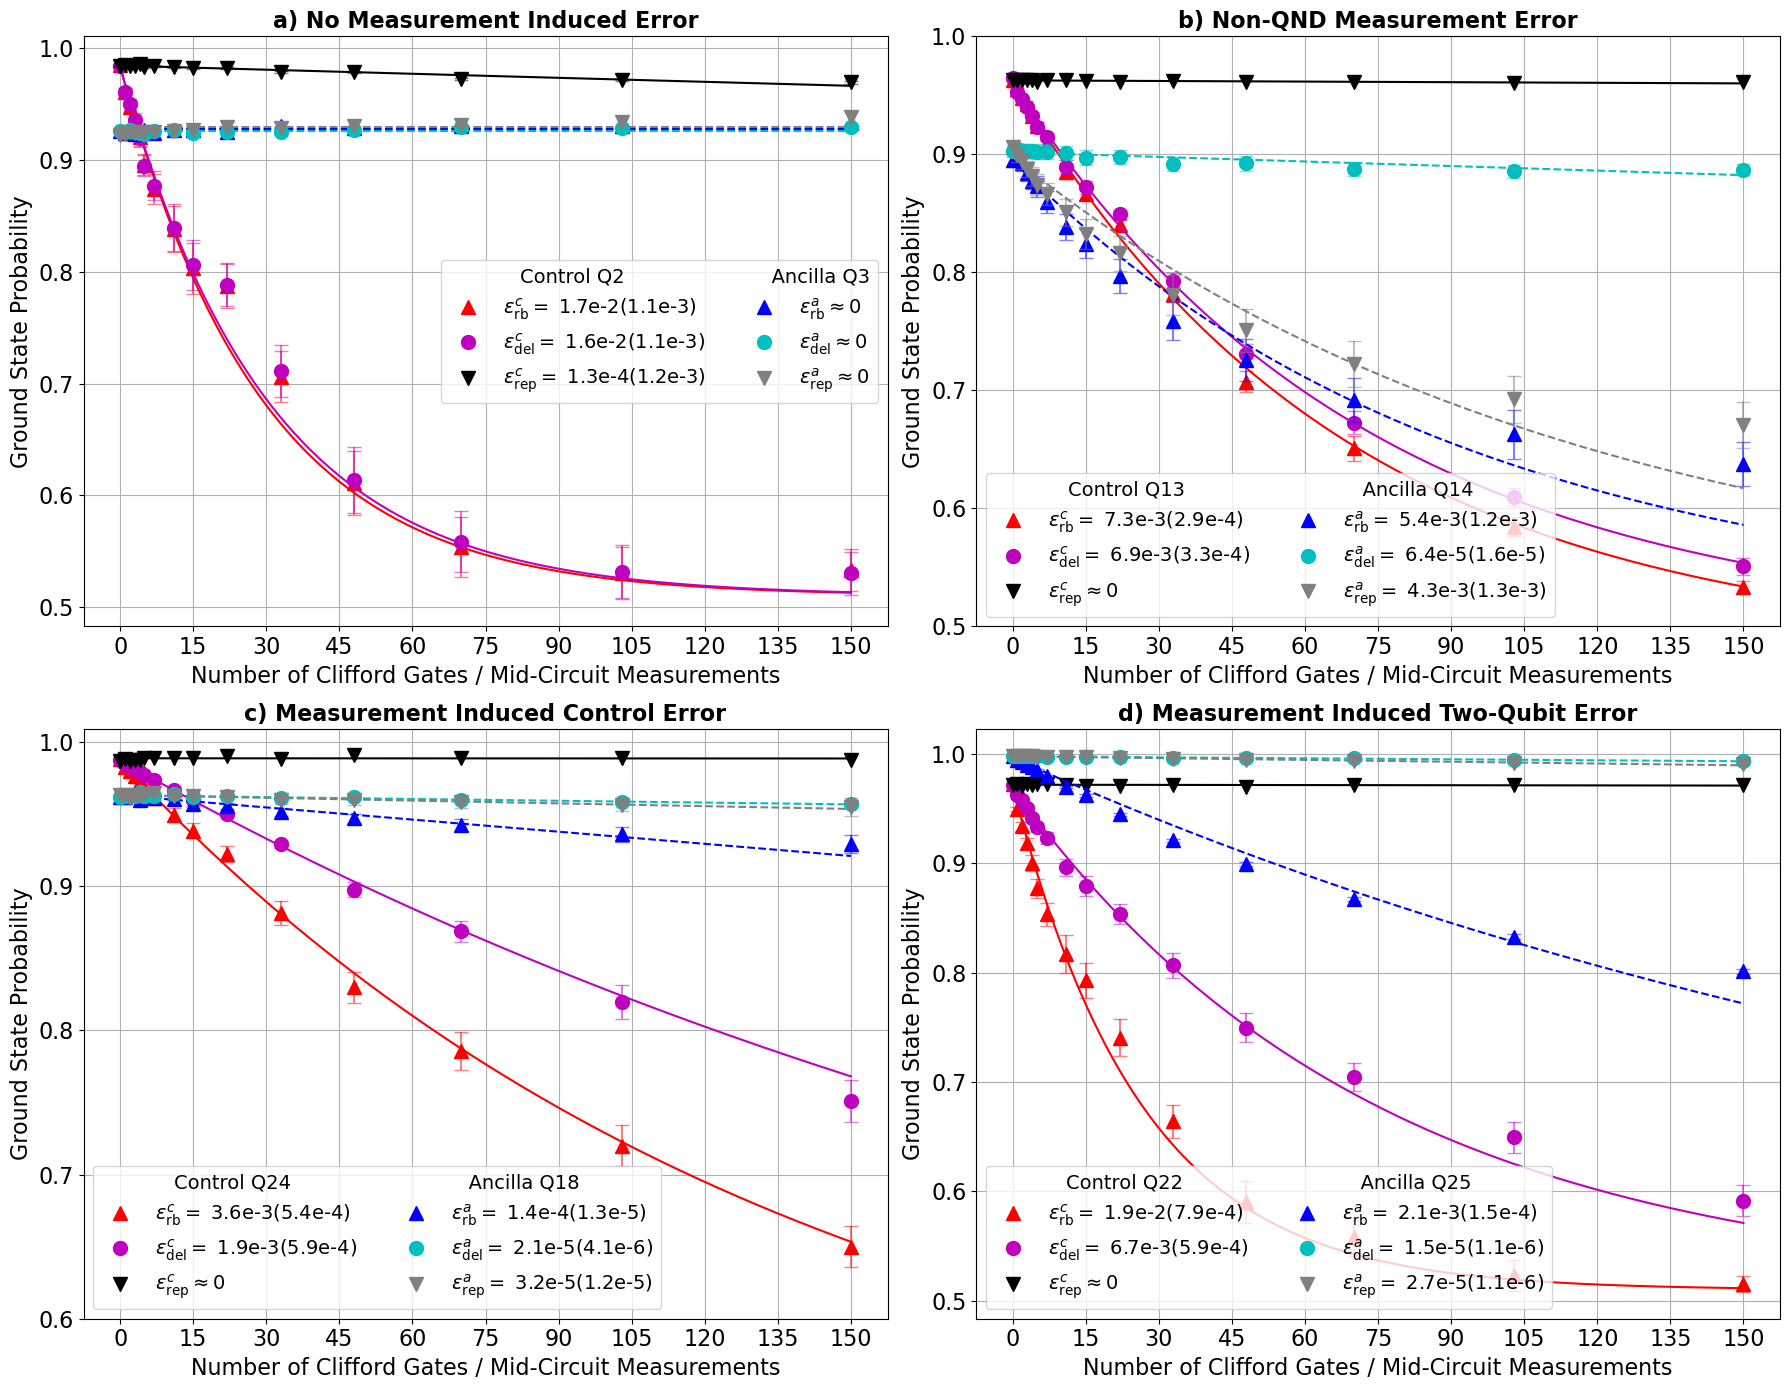

In [64]:
# My plot with standard error of the mean as error bars, and absolute_sigma = True

fig, ax = plt.subplots(2, 2, figsize=(18, 14))

i0 = 0
i1 = 1
fsize = 16
fsizel = 14
msize = 10

# No error

xval = xvals042622_1
data = data_1
colours = ['r', 'm', 'k', 'b', 'c', 'grey']
labels = ['c', 'a']
markers = ["^", "o", "v"]
exps = [r'\rm rb', r'\rm del', r'\rm rep']
lstyles = ['-', '--', '--']

q_list = full_q_list_1
qs = [2, 3]

fxval = np.arange(xval[0], xval[-1] + 1, 1)

for (k, q) in enumerate(qs):
    temp_ind = np.where(np.array(q_list) == q)[0][0]
    for j in range(3):
        ydata = np.mean(data[j, temp_ind, :, :], 0) / shots
        yerr = np.std(data[j, temp_ind, :, :], 0) / shots / np.sqrt(seeds)
        p0 = [0.5, 1, 0.5]
        # Debugging: Print ydata and yerr
        #print(f"Qubit: {q}, Experiment: {j}")
        ##print("yerr:", yerr)

        # Fit the data using curve_fit
        popt, pcov = curve_fit(mcmrb.expfunction_alpha, xval, ydata, p0=p0, sigma=yerr, absolute_sigma=True, bounds=([0, 0, 0.48], [0.51, 1, 0.51]))
        #popt, pcov = curve_fit(mcmrb.expfunction_alpha, xval, ydata, p0=p0, sigma=yerr, absolute_sigma=False, bounds=([0, 0, 0.48], [0.51, 1, 0.51]))
        
        # Debugging: Print fit parameters and covariance matrix
        #print("popt:", popt)
        #print("pcov:", pcov)

        std_errs = np.sqrt(np.diag(pcov))
        alpha = popt[1]
        alpha_err = std_errs[1]
        epc = (1 - alpha) / 2
        epc_err = 1 / 2 * alpha_err

        #print("epc:", epc)    

        if epc < 1e-8:
            ax[i0, i0].errorbar(xval, ydata, yerr=yerr, alpha=0.5, linestyle='', markersize=msize, marker='', color=colours[3 * k + j])
            ax[i0, i0].plot(xval, ydata, linestyle='', markersize=msize, marker=markers[j], color=colours[3 * k + j], label=r'$\epsilon^{%s}_{%s} \approx 0$' % (labels[k], exps[j]))
        else:
            ax[i0, i0].errorbar(xval, ydata, yerr=yerr, alpha=0.5, capsize=5, linestyle='', markersize=msize, marker='', color=colours[3 * k + j])
            ax[i0, i0].plot(xval, ydata, linestyle='', markersize=msize, marker=markers[j], color=colours[3 * k + j], label=format(r'$\epsilon^{%s}_{%s} = $' % (labels[k], exps[j]) + ' %.1e(%.1e)' % (epc, epc_err)).replace('e-0', 'e-'))

        ax[i0, i0].plot(fxval, mcmrb.expfunction_alpha(fxval, *popt), linestyle=lstyles[k], marker='', color=colours[3 * k + j])

leg = ax[i0, i0].legend(ncol=2, title='Control Q2                        Ancilla Q3', fontsize=fsizel, title_fontsize=fsizel)
leg._legend_box.align = "right"
ax[i0, i0].set_ylabel('Ground State Probability', fontsize=fsize)
ax[i0, i0].set_xlabel('Number of Clifford Gates / Mid-Circuit Measurements', fontsize=fsize)
ax[i0, i0].set_title('a) No Measurement Induced Error', fontsize=fsize, fontweight="bold")
ax[i0, i0].set_xticks(range(0, 160, 15))
ax[i0, i0].set_xticklabels(range(0, 160, 15), fontsize=fsize)
ax[i0, i0].set_yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
ax[i0, i0].set_yticklabels([0.5, 0.6, 0.7, 0.8, 0.9, 1.0], fontsize=fsize)
ax[i0, i0].grid('minor')

# non-QND

xval = xvals042622_1
data = data_1
colours = ['r','m','k','b','c','grey']
labels = ['c','a']
markers = ["^","o","v"]
exps = [r'\rm rb',r'\rm del',r'\rm rep']
lstyles = ['-','--','--']

q_list = full_q_list_1
# qs = [21,19]
qs = [13,14]

fxval = np.arange(xval[0],xval[-1]+1,1)

expfit = [True, True, False, True, False, True]
epc_limit = 1e-5

for (k, q) in enumerate(qs):
    temp_ind = np.where(np.array(q_list)==q)[0][0]
    for j in range(3):
        ydata = np.mean(data[j, temp_ind, :, :], 0) / shots
        yerr = np.std(data[j, temp_ind, :, :], 0) / shots / np.sqrt(seeds)
        p0 = [0.5, 1, 0.5]
        if expfit[3*k+j]:
            # exponential
            popt, pcov = curve_fit(mcmrb.expfunction_alpha, xval, ydata, sigma=yerr, p0=p0, absolute_sigma=True, bounds=([0, 0, 0.48], [0.51, 1, 0.51]))
            #popt, pcov = curve_fit(mcmrb.expfunction_alpha, xval, ydata, sigma=yerr, p0=p0, absolute_sigma=False, bounds=([0, 0, 0.48], [0.51, 1, 0.51]))
            std_errs = np.sqrt(np.diag(pcov))
            alpha = popt[1]
            alpha_err = std_errs[1]
            epc = (1 - alpha) / 2
            epc_err = 1 / 2 * alpha_err

            if epc < epc_limit:
                ax[i0,i1].errorbar(xval, ydata,yerr=yerr,alpha = 0.5,linestyle='',markersize=msize, marker='',color=colours[3*k+j])
                ax[i0,i1].plot(xval, ydata,linestyle='',markersize=msize, marker=markers[j],color=colours[3*k+j],label= r'$\epsilon^{%s}_{%s} \approx 0$'%(labels[k],exps[j]))
            else:
                ax[i0,i1].errorbar(xval, ydata,yerr=yerr,alpha = 0.5,capsize=5,linestyle='',markersize=msize, marker='',color=colours[3*k+j])
                ax[i0,i1].plot(xval, ydata,linestyle='',markersize=msize, marker=markers[j],color=colours[3*k+j],label= format(r'$\epsilon^{%s}_{%s} = $'%(labels[k],exps[j]) +' %.1e(%.1e)'%(epc,epc_err)).replace('e-0','e-'))

            ax[i0,i1].plot(fxval, mcmrb.expfunction_alpha(fxval,*popt),linestyle=lstyles[k], marker='',color=colours[3*k+j])
            
        else:
            # linear
            popt, pcov = curve_fit(mcmrb.linearfunction, xval, ydata, sigma=yerr, absolute_sigma=True)
            #popt, pcov = curve_fit(mcmrb.linearfunction, xval, ydata, sigma=yerr, absolute_sigma=False)
            std_errs = np.sqrt(np.diag(pcov))
            alpha = np.exp(-popt[0])
            alpha_err = std_errs[0]*alpha
            epc = (1 - alpha) / 2
            epc_err = 1 / 2 * alpha_err
            

            if epc < epc_limit:
                ax[i0,i1].errorbar(xval, ydata,yerr=yerr,alpha = 0.5,linestyle='',markersize=msize, marker='',color=colours[3*k+j])
                ax[i0,i1].plot(xval, ydata,linestyle='',markersize=msize, marker=markers[j],color=colours[3*k+j],label= r'$\epsilon^{%s}_{%s} \approx 0$'%(labels[k],exps[j]))
            else:
                ax[i0,i1].errorbar(xval, ydata,yerr=yerr,alpha = 0.5,capsize=5,linestyle='',markersize=msize, marker='',color=colours[3*k+j])
                ax[i0,i1].plot(xval, ydata,linestyle='',markersize=msize, marker=markers[j],color=colours[3*k+j],label= format(r'$\epsilon^{%s}_{%s} = $'%(labels[k],exps[j]) +' %.1e(%.1e)'%(epc,epc_err)).replace('e-0','e-'))

            ax[i0,i1].plot(fxval, mcmrb.linearfunction(fxval,*popt),linestyle=lstyles[k], marker='',color=colours[3*k+j])

ax[i0,i1].legend(loc=3,ncol = 2,title='Control Q13                             Ancilla Q14',fontsize=fsizel,title_fontsize=fsizel)   
# plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
ax[i0,i1].set_ylabel('Ground State Probability',fontsize=fsize)
ax[i0,i1].set_xlabel('Number of Clifford Gates / Mid-Circuit Measurements',fontsize=fsize)
ax[i0,i1].set_title('b) Non-QND Measurement Error',fontsize=fsize,fontweight="bold")
ax[i0,i1].set_xticks(range(0,160,15))
ax[i0,i1].set_xticklabels(range(0,160,15),fontsize=fsize)
ax[i0,i1].set_yticks([0.5,0.6,0.7,0.8,0.9,1.0])
ax[i0,i1].set_yticklabels([0.5,0.6,0.7,0.8,0.9,1.0],fontsize=fsize)
ax[i0,i1].grid('minor')

# Stark

xval = xvals042622_1
data = data_1
colours = ['r','m','k','b','c','grey']
labels = ['c','a']
markers = ["^","o","v"]
exps = [r'\rm rb',r'\rm del',r'\rm rep']
lstyles = ['-','--','--']

q_list = full_q_list_1
# qs = [15,12]
qs = [24,18]

fxval = np.arange(xval[0],xval[-1]+1,1)

expfit = [True, True, False, False, False, False]
epc_limit = 1e-5

for (k, q) in enumerate(qs):
    temp_ind = np.where(np.array(q_list)==q)[0][0]
    for j in range(3):
        ydata = np.mean(data[j, temp_ind, :, :], 0) / shots
        yerr = np.std(data[j, temp_ind, :, :], 0) / shots / np.sqrt(seeds)
        p0 = [0.5, 1, 0.5]

        if expfit[3*k+j]:
            # exponential
            popt, pcov = curve_fit(mcmrb.expfunction_alpha, xval, ydata, sigma=yerr, p0=p0, absolute_sigma=True, bounds=([0, 0, 0.48], [0.51, 1, 0.51]))
            #popt, pcov = curve_fit(mcmrb.expfunction_alpha, xval, ydata, sigma=yerr, p0=p0, absolute_sigma=False, bounds=([0, 0, 0.48], [0.51, 1, 0.51]))
            std_errs = np.sqrt(np.diag(pcov))
            alpha = popt[1]
            alpha_err = std_errs[1]
            epc = (1 - alpha) / 2
            epc_err = 1 / 2 * alpha_err

            if epc < epc_limit:
                ax[i1,i0].errorbar(xval, ydata,yerr=yerr,alpha = 0.5,linestyle='',markersize=msize, marker='',color=colours[3*k+j])
                ax[i1,i0].plot(xval, ydata,linestyle='',markersize=msize, marker=markers[j],color=colours[3*k+j],label= r'$\epsilon^{%s}_{%s} \approx 0$'%(labels[k],exps[j]))
            else:
                ax[i1,i0].errorbar(xval, ydata,yerr=yerr,alpha = 0.5,capsize=5,linestyle='',markersize=msize, marker='',color=colours[3*k+j])
                ax[i1,i0].plot(xval, ydata,linestyle='',markersize=msize, marker=markers[j],color=colours[3*k+j],label= format(r'$\epsilon^{%s}_{%s} = $'%(labels[k],exps[j]) +' %.1e(%.1e)'%(epc,epc_err)).replace('e-0','e-'))

            ax[i1,i0].plot(fxval, mcmrb.expfunction_alpha(fxval,*popt),linestyle=lstyles[k], marker='',color=colours[3*k+j])
            
        else:
            # linear
            popt, pcov = curve_fit(mcmrb.linearfunction, xval, ydata, sigma=yerr, absolute_sigma=True)
            #popt, pcov = curve_fit(mcmrb.linearfunction, xval, ydata, sigma=yerr, absolute_sigma=False)
            std_errs = np.sqrt(np.diag(pcov))
            alpha = np.exp(-popt[0])
            alpha_err = std_errs[0]*alpha
            epc = (1 - alpha) / 2
            epc_err = 1 / 2 * alpha_err

            if epc < epc_limit:
                ax[i1,i0].errorbar(xval, ydata,yerr=yerr,alpha = 0.5,linestyle='',markersize=msize, marker='',color=colours[3*k+j])
                ax[i1,i0].plot(xval, ydata,linestyle='',markersize=msize, marker=markers[j],color=colours[3*k+j],label= r'$\epsilon^{%s}_{%s} \approx 0$'%(labels[k],exps[j]))
            else:
                ax[i1,i0].errorbar(xval, ydata,yerr=yerr,alpha = 0.5,capsize=5,linestyle='',markersize=msize, marker='',color=colours[3*k+j])
                ax[i1,i0].plot(xval, ydata,linestyle='',markersize=msize, marker=markers[j],color=colours[3*k+j],label= format(r'$\epsilon^{%s}_{%s} = $'%(labels[k],exps[j]) +' %.1e(%.1e)'%(epc,epc_err)).replace('e-0','e-'))

            ax[i1,i0].plot(fxval, mcmrb.linearfunction(fxval,*popt),linestyle=lstyles[k], marker='',color=colours[3*k+j])

ax[i1,i0].legend(ncol = 2,title='Control Q24                             Ancilla Q18',fontsize=fsizel,title_fontsize=fsizel)   
# plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
ax[i1,i0].set_ylabel('Ground State Probability',fontsize=fsize)
ax[i1,i0].set_xlabel('Number of Clifford Gates / Mid-Circuit Measurements',fontsize=fsize)
ax[i1,i0].set_xticks(range(0,160,15))
ax[i1,i0].set_xticklabels(range(0,160,15),fontsize=fsize)
ax[i1,i0].set_yticks([0.6,0.7,0.8,0.9,1.0])
ax[i1,i0].set_yticklabels([0.6,0.7,0.8,0.9,1.0],fontsize=fsize)
ax[i1,i0].grid('minor')
ax[i1,i0].set_title('c) Measurement Induced Control Error',fontsize=fsize,fontweight="bold")


# Collision

xval = xvals042622_1
data = data_1
colours = ['r','m','k','b','c','grey']
labels = ['c','a']
markers = ["^","o","v"]
exps = [r'\rm rb',r'\rm del',r'\rm rep']
lstyles = ['-','--','--']

q_list = full_q_list_1
qs = [22,25]

fxval = np.arange(xval[0],xval[-1]+1,1)

expfit = [True, True, False, True, False, False]
epc_limit = 1e-5

for (k, q) in enumerate(qs):
    temp_ind = np.where(np.array(q_list)==q)[0][0]
    for j in range(3):       
        ydata = np.mean(data[j, temp_ind, :, :], 0) / shots
        yerr = np.std(data[j, temp_ind, :, :], 0) / shots / np.sqrt(seeds)
        p0 = [0.5, 1, 0.5]

        if expfit[3*k+j]:
            # exponential
            popt, pcov = curve_fit(mcmrb.expfunction_alpha, xval, ydata, sigma=yerr, p0=p0, absolute_sigma=True, bounds=([0, 0, 0.48], [0.51, 1, 0.51]))
            #popt, pcov = curve_fit(mcmrb.expfunction_alpha, xval, ydata, sigma=yerr, p0=p0, absolute_sigma=False, bounds=([0, 0, 0.48], [0.51, 1, 0.51]))
            std_errs = np.sqrt(np.diag(pcov))
            alpha = popt[1]
            alpha_err = std_errs[1]
            epc = (1 - alpha) / 2
            epc_err = 1 / 2 * alpha_err
            print(r'$\epsilon^{%s}_{%s} = $'%(labels[k],exps[j]) +' %.1e(%.1e)'%(epc,epc_err))
            print('epc:', epc)
            print("popt:", popt)
            if epc < epc_limit:
                ax[i1,i1].errorbar(xval, ydata,yerr=yerr,alpha = 0.5,linestyle='',markersize=msize, marker='',color=colours[3*k+j])
                ax[i1,i1].plot(xval, ydata,linestyle='',markersize=msize, marker=markers[j],color=colours[3*k+j],label= r'$\epsilon^{%s}_{%s} \approx 0$'%(labels[k],exps[j]))
            else:
                ax[i1,i1].errorbar(xval, ydata,yerr=yerr,alpha = 0.5,capsize=5,linestyle='',markersize=msize, marker='',color=colours[3*k+j])
                ax[i1,i1].plot(xval, ydata,linestyle='',markersize=msize, marker=markers[j],color=colours[3*k+j],label= format(r'$\epsilon^{%s}_{%s} = $'%(labels[k],exps[j]) +' %.1e(%.1e)'%(epc,epc_err)).replace('e-0','e-'))

                
            ax[i1,i1].plot(fxval, mcmrb.expfunction_alpha(fxval,*popt),linestyle=lstyles[k], marker='',color=colours[3*k+j])
            
        else:
            # linear
            popt, pcov = curve_fit(mcmrb.linearfunction, xval, ydata, sigma=yerr, absolute_sigma=True)
            #popt, pcov = curve_fit(mcmrb.linearfunction, xval, ydata, sigma=yerr, absolute_sigma=False)
            std_errs = np.sqrt(np.diag(pcov))
            alpha = np.exp(-popt[0])
            alpha_err = std_errs[0]*alpha
            epc = (1 - alpha) / 2
            epc_err = 1 / 2 * alpha_err
            print(r'$\epsilon^{%s}_{%s} = $'%(labels[k],exps[j]) +' %.1e(%.1e)'%(epc,epc_err))
            print('epc:', epc)
            print("popt:", popt)
            if epc < epc_limit:
                ax[i1,i1].errorbar(xval, ydata,yerr=yerr,alpha = 0.5,linestyle='',markersize=msize, marker='',color=colours[3*k+j])
                ax[i1,i1].plot(xval, ydata,linestyle='',markersize=msize, marker=markers[j],color=colours[3*k+j],label= r'$\epsilon^{%s}_{%s} \approx 0$'%(labels[k],exps[j]))
            else:
                ax[i1,i1].errorbar(xval, ydata,yerr=yerr,alpha = 0.5,capsize=5,linestyle='',markersize=msize, marker='',color=colours[3*k+j])
                ax[i1,i1].plot(xval, ydata,linestyle='',markersize=msize, marker=markers[j],color=colours[3*k+j],label= format(r'$\epsilon^{%s}_{%s} = $'%(labels[k],exps[j]) +' %.1e(%.1e)'%(epc,epc_err)).replace('e-0','e-'))

            ax[i1,i1].plot(fxval, mcmrb.linearfunction(fxval,*popt),linestyle=lstyles[k], marker='',color=colours[3*k+j])


ax[i1,i1].legend(loc=3,ncol = 2,title='Control Q22                             Ancilla Q25',fontsize=fsizel,title_fontsize=fsizel)   
# plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
ax[i1,i1].set_ylabel('Ground State Probability',fontsize=fsize)
ax[i1,i1].set_xlabel('Number of Clifford Gates / Mid-Circuit Measurements',fontsize=fsize)
ax[i1,i1].set_xticks(range(0,160,15))
ax[i1,i1].set_xticklabels(range(0,160,15),fontsize=fsize)
ax[i1,i1].set_yticks([0.5,0.6,0.7,0.8,0.9,1.0])
ax[i1,i1].set_yticklabels([0.5,0.6,0.7,0.8,0.9,1.0],fontsize=fsize)
ax[i1,i1].set_title('d) Measurement Induced Two-Qubit Error',fontsize=fsize,fontweight="bold")
ax[i1,i1].grid('minor')

plt.tight_layout();

# plt.savefig('Plots/All_signatures_042622_linear.pdf',facecolor=(1, 1, 1),bbox_inches='tight')

pcov: [[ 4.30682181e-04  4.55666050e-05 -4.30911530e-04]
 [ 4.55666050e-05  9.25797686e-06 -4.60943425e-05]
 [-4.30911530e-04 -4.60943425e-05  4.32100467e-04]]
pcov: [[ 4.28441834e-04  4.39634883e-05 -4.28804014e-04]
 [ 4.39634883e-05  8.52016929e-06 -4.45880320e-05]
 [-4.28804014e-04 -4.45880320e-05  4.30310005e-04]]
pcov: [[ 4.38446260e+01  2.43043434e-02 -4.38462057e+01]
 [ 2.43043434e-02  1.34730811e-05 -2.43052239e-02]
 [-4.38462057e+01 -2.43052239e-02  4.38477855e+01]]
pcov: [[ 3.57946713e-07 -1.66810350e-08  3.57946713e-07]
 [-1.66810350e-08  1.81732449e-09 -1.66810350e-08]
 [ 3.57946713e-07 -1.66810350e-08  3.57946713e-07]]
pcov: [[ 1.32653126e-07 -6.33529968e-09  1.32653126e-07]
 [-6.33529968e-09  7.99191245e-10 -6.33529968e-09]
 [ 1.32653126e-07 -6.33529968e-09  1.32653126e-07]]
pcov: [[ 8.52501389e-07 -3.92570710e-08  8.52501389e-07]
 [-3.92570710e-08  4.09275546e-09 -3.92570710e-08]
 [ 8.52501389e-07 -3.92570710e-08  8.52501389e-07]]


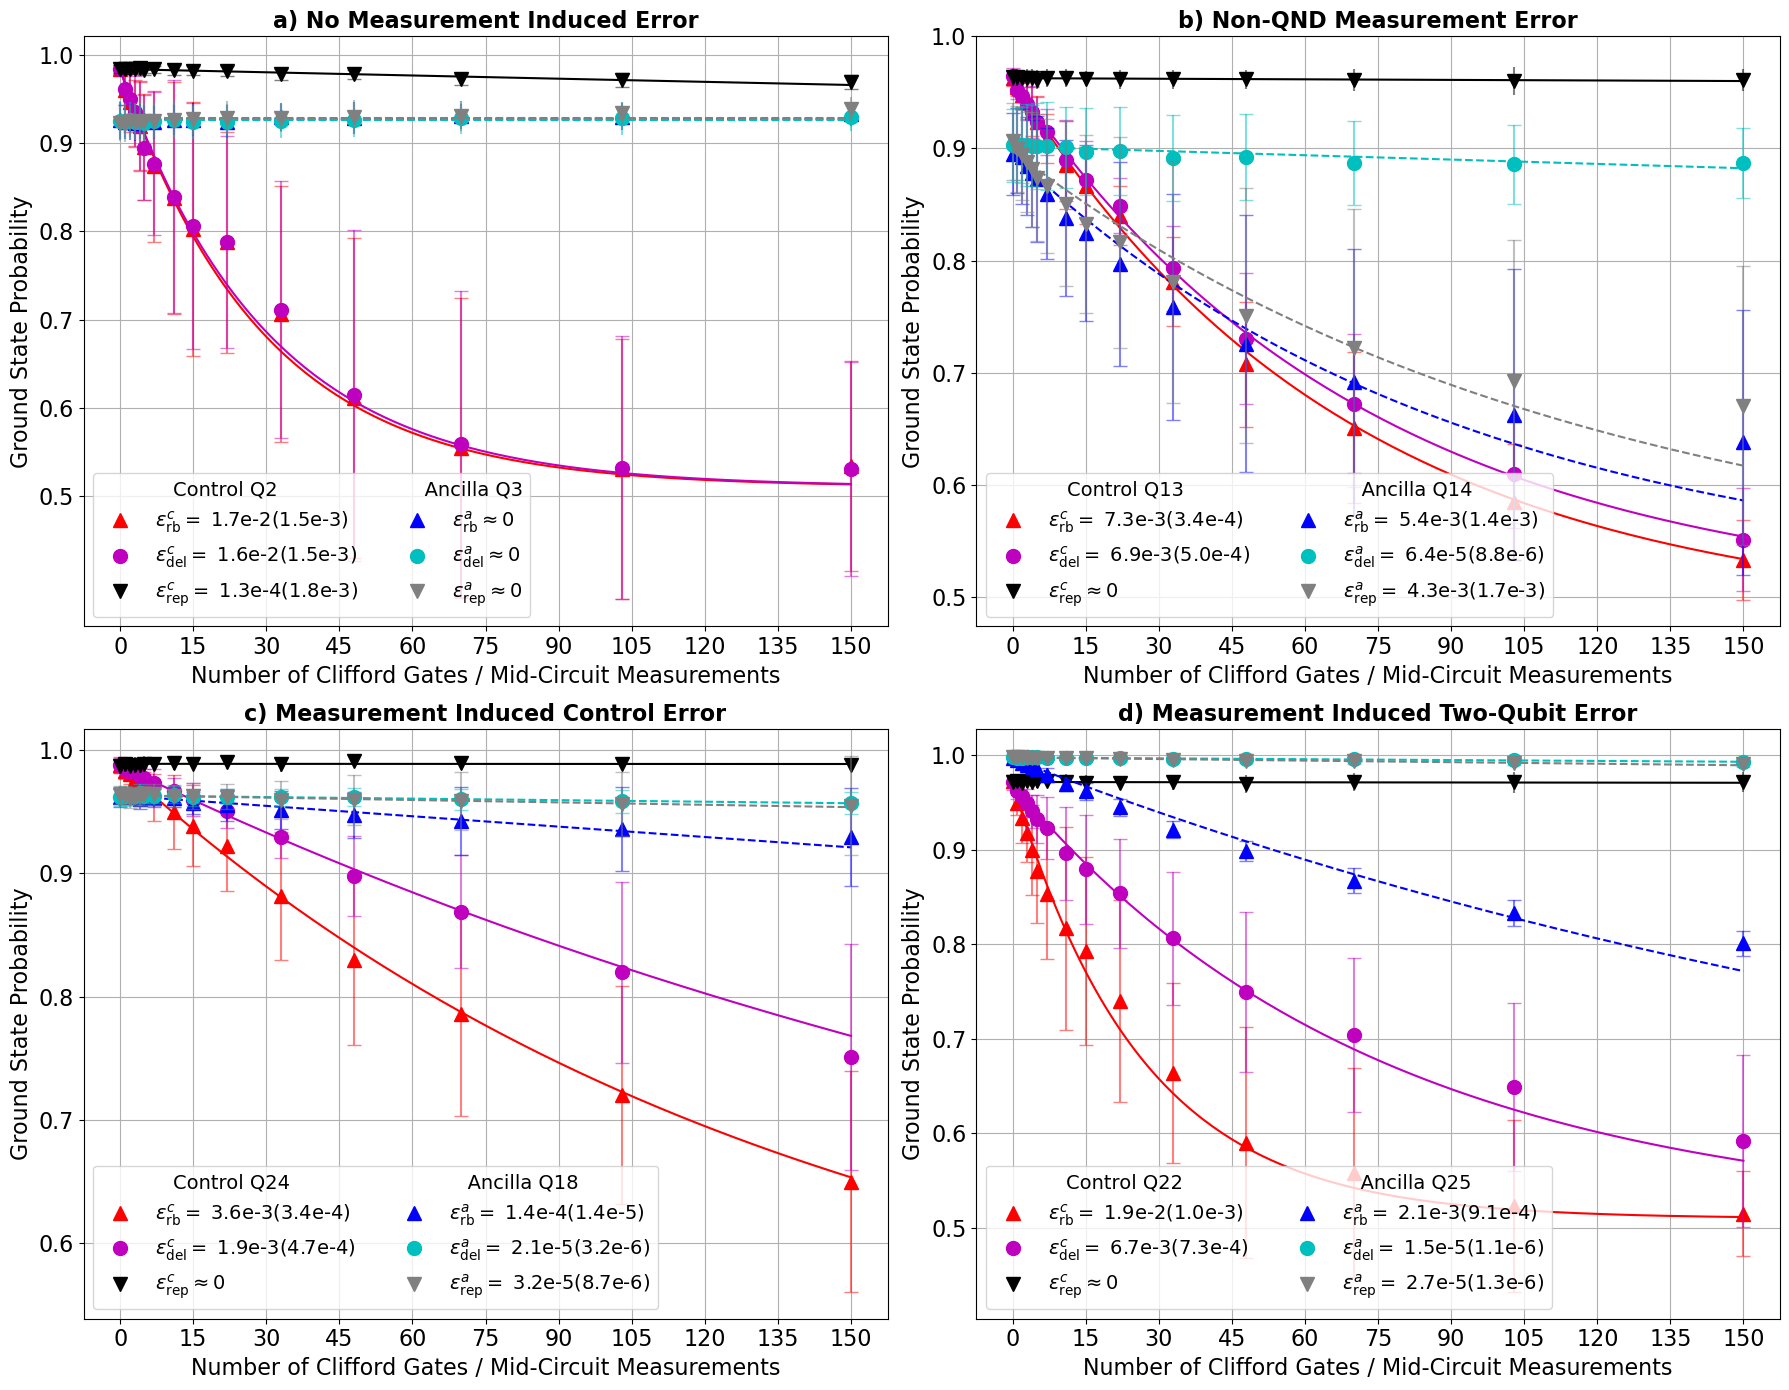

In [65]:
# My plot with standard deviation of the measurements as error bars and absolute_sigma = False
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt


fig, ax = plt.subplots(2, 2, figsize=(18, 14))

i0 = 0
i1 = 1
fsize = 16
fsizel = 14
msize = 10

# No error

xval = xvals042622_1
data = data_1
colours = ['r', 'm', 'k', 'b', 'c', 'grey']
labels = ['c', 'a']
markers = ["^", "o", "v"]
exps = [r'\rm rb', r'\rm del', r'\rm rep']
lstyles = ['-', '--', '--']

q_list = full_q_list_1
qs = [2, 3]

fxval = np.arange(xval[0], xval[-1] + 1, 1)

for (k, q) in enumerate(qs):
    temp_ind = np.where(np.array(q_list) == q)[0][0]
    for j in range(3):
        ydata = np.mean(data[j, temp_ind, :, :], 0) / shots
        yerr = np.std(data[j, temp_ind, :, :], 0) / shots
        p0 = [0.5, 1, 0.5]
        # Debugging: Print ydata and yerr
        #print(f"Qubit: {q}, Experiment: {j}")
        ##print("yerr:", yerr)

        # Fit the data using curve_fit
        #popt, pcov = curve_fit(mcmrb.expfunction_alpha, xval, ydata, p0=p0, sigma=yerr, absolute_sigma=True, bounds=([0, 0, 0.48], [0.51, 1, 0.51]))
        popt, pcov = curve_fit(mcmrb.expfunction_alpha, xval, ydata, p0=p0, sigma=yerr, absolute_sigma=False, bounds=([0, 0, 0.48], [0.51, 1, 0.51]))
        
        # Debugging: Print fit parameters and covariance matrix
        #print("popt:", popt)
        print("pcov:", pcov)

        std_errs = np.sqrt(np.diag(pcov))
        alpha = popt[1]
        alpha_err = std_errs[1]
        epc = (1 - alpha) / 2
        epc_err = 1 / 2 * alpha_err

        #print("epc:", epc)    

        if epc < 1e-8:
            ax[i0, i0].errorbar(xval, ydata, yerr=yerr, alpha=0.5, linestyle='', markersize=msize, marker='', color=colours[3 * k + j])
            ax[i0, i0].plot(xval, ydata, linestyle='', markersize=msize, marker=markers[j], color=colours[3 * k + j], label=r'$\epsilon^{%s}_{%s} \approx 0$' % (labels[k], exps[j]))
        else:
            ax[i0, i0].errorbar(xval, ydata, yerr=yerr, alpha=0.5, capsize=5, linestyle='', markersize=msize, marker='', color=colours[3 * k + j])
            ax[i0, i0].plot(xval, ydata, linestyle='', markersize=msize, marker=markers[j], color=colours[3 * k + j], label=format(r'$\epsilon^{%s}_{%s} = $' % (labels[k], exps[j]) + ' %.1e(%.1e)' % (epc, epc_err)).replace('e-0', 'e-'))

        ax[i0, i0].plot(fxval, mcmrb.expfunction_alpha(fxval, *popt), linestyle=lstyles[k], marker='', color=colours[3 * k + j])

leg = ax[i0, i0].legend(ncol=2, title='Control Q2                        Ancilla Q3', fontsize=fsizel, title_fontsize=fsizel)
leg._legend_box.align = "right"
ax[i0, i0].set_ylabel('Ground State Probability', fontsize=fsize)
ax[i0, i0].set_xlabel('Number of Clifford Gates / Mid-Circuit Measurements', fontsize=fsize)
ax[i0, i0].set_title('a) No Measurement Induced Error', fontsize=fsize, fontweight="bold")
ax[i0, i0].set_xticks(range(0, 160, 15))
ax[i0, i0].set_xticklabels(range(0, 160, 15), fontsize=fsize)
ax[i0, i0].set_yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
ax[i0, i0].set_yticklabels([0.5, 0.6, 0.7, 0.8, 0.9, 1.0], fontsize=fsize)
ax[i0, i0].grid('minor')

# non-QND

xval = xvals042622_1
data = data_1
colours = ['r','m','k','b','c','grey']
labels = ['c','a']
markers = ["^","o","v"]
exps = [r'\rm rb',r'\rm del',r'\rm rep']
lstyles = ['-','--','--']

q_list = full_q_list_1
# qs = [21,19]
qs = [13,14]

fxval = np.arange(xval[0],xval[-1]+1,1)

expfit = [True, True, False, True, False, True]
epc_limit = 1e-5

for (k, q) in enumerate(qs):
    temp_ind = np.where(np.array(q_list)==q)[0][0]
    for j in range(3):
        ydata = np.mean(data[j, temp_ind, :, :], 0) / shots
        yerr = np.std(data[j, temp_ind, :, :], 0) / shots
        p0 = [0.5, 1, 0.5]
        if expfit[3*k+j]:
            # exponential
            #popt, pcov = curve_fit(mcmrb.expfunction_alpha, xval, ydata, sigma=yerr, p0=p0, absolute_sigma=True, bounds=([0, 0, 0.48], [0.51, 1, 0.51]))
            popt, pcov = curve_fit(mcmrb.expfunction_alpha, xval, ydata, sigma=yerr, p0=p0, absolute_sigma=False, bounds=([0, 0, 0.48], [0.51, 1, 0.51]))
            std_errs = np.sqrt(np.diag(pcov))
            alpha = popt[1]
            alpha_err = std_errs[1]
            epc = (1 - alpha) / 2
            epc_err = 1 / 2 * alpha_err

            if epc < epc_limit:
                ax[i0,i1].errorbar(xval, ydata,yerr=yerr,alpha = 0.5,linestyle='',markersize=msize, marker='',color=colours[3*k+j])
                ax[i0,i1].plot(xval, ydata,linestyle='',markersize=msize, marker=markers[j],color=colours[3*k+j],label= r'$\epsilon^{%s}_{%s} \approx 0$'%(labels[k],exps[j]))
            else:
                ax[i0,i1].errorbar(xval, ydata,yerr=yerr,alpha = 0.5,capsize=5,linestyle='',markersize=msize, marker='',color=colours[3*k+j])
                ax[i0,i1].plot(xval, ydata,linestyle='',markersize=msize, marker=markers[j],color=colours[3*k+j],label= format(r'$\epsilon^{%s}_{%s} = $'%(labels[k],exps[j]) +' %.1e(%.1e)'%(epc,epc_err)).replace('e-0','e-'))

            ax[i0,i1].plot(fxval, mcmrb.expfunction_alpha(fxval,*popt),linestyle=lstyles[k], marker='',color=colours[3*k+j])
            
        else:
            # linear
            #popt, pcov = curve_fit(mcmrb.linearfunction, xval, ydata, sigma=yerr, absolute_sigma=True)
            popt, pcov = curve_fit(mcmrb.linearfunction, xval, ydata, sigma=yerr, absolute_sigma=False)
            std_errs = np.sqrt(np.diag(pcov))
            alpha = np.exp(-popt[0])
            alpha_err = std_errs[0]*alpha
            epc = (1 - alpha) / 2
            epc_err = 1 / 2 * alpha_err
            

            if epc < epc_limit:
                ax[i0,i1].errorbar(xval, ydata,yerr=yerr,alpha = 0.5,linestyle='',markersize=msize, marker='',color=colours[3*k+j])
                ax[i0,i1].plot(xval, ydata,linestyle='',markersize=msize, marker=markers[j],color=colours[3*k+j],label= r'$\epsilon^{%s}_{%s} \approx 0$'%(labels[k],exps[j]))
            else:
                ax[i0,i1].errorbar(xval, ydata,yerr=yerr,alpha = 0.5,capsize=5,linestyle='',markersize=msize, marker='',color=colours[3*k+j])
                ax[i0,i1].plot(xval, ydata,linestyle='',markersize=msize, marker=markers[j],color=colours[3*k+j],label= format(r'$\epsilon^{%s}_{%s} = $'%(labels[k],exps[j]) +' %.1e(%.1e)'%(epc,epc_err)).replace('e-0','e-'))

            ax[i0,i1].plot(fxval, mcmrb.linearfunction(fxval,*popt),linestyle=lstyles[k], marker='',color=colours[3*k+j])

ax[i0,i1].legend(loc=3,ncol = 2,title='Control Q13                             Ancilla Q14',fontsize=fsizel,title_fontsize=fsizel)   
# plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
ax[i0,i1].set_ylabel('Ground State Probability',fontsize=fsize)
ax[i0,i1].set_xlabel('Number of Clifford Gates / Mid-Circuit Measurements',fontsize=fsize)
ax[i0,i1].set_title('b) Non-QND Measurement Error',fontsize=fsize,fontweight="bold")
ax[i0,i1].set_xticks(range(0,160,15))
ax[i0,i1].set_xticklabels(range(0,160,15),fontsize=fsize)
ax[i0,i1].set_yticks([0.5,0.6,0.7,0.8,0.9,1.0])
ax[i0,i1].set_yticklabels([0.5,0.6,0.7,0.8,0.9,1.0],fontsize=fsize)
ax[i0,i1].grid('minor')

# Stark

xval = xvals042622_1
data = data_1
colours = ['r','m','k','b','c','grey']
labels = ['c','a']
markers = ["^","o","v"]
exps = [r'\rm rb',r'\rm del',r'\rm rep']
lstyles = ['-','--','--']

q_list = full_q_list_1
# qs = [15,12]
qs = [24,18]

fxval = np.arange(xval[0],xval[-1]+1,1)

expfit = [True, True, False, False, False, False]
epc_limit = 1e-5

for (k, q) in enumerate(qs):
    temp_ind = np.where(np.array(q_list)==q)[0][0]
    for j in range(3):
        ydata = np.mean(data[j, temp_ind, :, :], 0) / shots
        yerr = np.std(data[j, temp_ind, :, :], 0) / shots
        p0 = [0.5, 1, 0.5]

        if expfit[3*k+j]:
            # exponential
            #popt, pcov = curve_fit(mcmrb.expfunction_alpha, xval, ydata, sigma=yerr, p0=p0, absolute_sigma=True, bounds=([0, 0, 0.48], [0.51, 1, 0.51]))
            popt, pcov = curve_fit(mcmrb.expfunction_alpha, xval, ydata, sigma=yerr, p0=p0, absolute_sigma=False, bounds=([0, 0, 0.48], [0.51, 1, 0.51]))
            std_errs = np.sqrt(np.diag(pcov))
            alpha = popt[1]
            alpha_err = std_errs[1]
            epc = (1 - alpha) / 2
            epc_err = 1 / 2 * alpha_err

            if epc < epc_limit:
                ax[i1,i0].errorbar(xval, ydata,yerr=yerr,alpha = 0.5,linestyle='',markersize=msize, marker='',color=colours[3*k+j])
                ax[i1,i0].plot(xval, ydata,linestyle='',markersize=msize, marker=markers[j],color=colours[3*k+j],label= r'$\epsilon^{%s}_{%s} \approx 0$'%(labels[k],exps[j]))
            else:
                ax[i1,i0].errorbar(xval, ydata,yerr=yerr,alpha = 0.5,capsize=5,linestyle='',markersize=msize, marker='',color=colours[3*k+j])
                ax[i1,i0].plot(xval, ydata,linestyle='',markersize=msize, marker=markers[j],color=colours[3*k+j],label= format(r'$\epsilon^{%s}_{%s} = $'%(labels[k],exps[j]) +' %.1e(%.1e)'%(epc,epc_err)).replace('e-0','e-'))

            ax[i1,i0].plot(fxval, mcmrb.expfunction_alpha(fxval,*popt),linestyle=lstyles[k], marker='',color=colours[3*k+j])
            
        else:
            # linear
            #popt, pcov = curve_fit(mcmrb.linearfunction, xval, ydata, sigma=yerr, absolute_sigma=True)
            popt, pcov = curve_fit(mcmrb.linearfunction, xval, ydata, sigma=yerr, absolute_sigma=False)
            std_errs = np.sqrt(np.diag(pcov))
            alpha = np.exp(-popt[0])
            alpha_err = std_errs[0]*alpha
            epc = (1 - alpha) / 2
            epc_err = 1 / 2 * alpha_err

            if epc < epc_limit:
                ax[i1,i0].errorbar(xval, ydata,yerr=yerr,alpha = 0.5,linestyle='',markersize=msize, marker='',color=colours[3*k+j])
                ax[i1,i0].plot(xval, ydata,linestyle='',markersize=msize, marker=markers[j],color=colours[3*k+j],label= r'$\epsilon^{%s}_{%s} \approx 0$'%(labels[k],exps[j]))
            else:
                ax[i1,i0].errorbar(xval, ydata,yerr=yerr,alpha = 0.5,capsize=5,linestyle='',markersize=msize, marker='',color=colours[3*k+j])
                ax[i1,i0].plot(xval, ydata,linestyle='',markersize=msize, marker=markers[j],color=colours[3*k+j],label= format(r'$\epsilon^{%s}_{%s} = $'%(labels[k],exps[j]) +' %.1e(%.1e)'%(epc,epc_err)).replace('e-0','e-'))

            ax[i1,i0].plot(fxval, mcmrb.linearfunction(fxval,*popt),linestyle=lstyles[k], marker='',color=colours[3*k+j])

ax[i1,i0].legend(ncol = 2,title='Control Q24                             Ancilla Q18',fontsize=fsizel,title_fontsize=fsizel)   
# plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
ax[i1,i0].set_ylabel('Ground State Probability',fontsize=fsize)
ax[i1,i0].set_xlabel('Number of Clifford Gates / Mid-Circuit Measurements',fontsize=fsize)
ax[i1,i0].set_xticks(range(0,160,15))
ax[i1,i0].set_xticklabels(range(0,160,15),fontsize=fsize)
ax[i1,i0].set_yticks([0.6,0.7,0.8,0.9,1.0])
ax[i1,i0].set_yticklabels([0.6,0.7,0.8,0.9,1.0],fontsize=fsize)
ax[i1,i0].grid('minor')
ax[i1,i0].set_title('c) Measurement Induced Control Error',fontsize=fsize,fontweight="bold")


# Collision

xval = xvals042622_1
data = data_1
colours = ['r','m','k','b','c','grey']
labels = ['c','a']
markers = ["^","o","v"]
exps = [r'\rm rb',r'\rm del',r'\rm rep']
lstyles = ['-','--','--']

q_list = full_q_list_1
qs = [22,25]

fxval = np.arange(xval[0],xval[-1]+1,1)

expfit = [True, True, False, True, False, False]
epc_limit = 1e-5

for (k, q) in enumerate(qs):
    temp_ind = np.where(np.array(q_list)==q)[0][0]
    for j in range(3):       
        ydata = np.mean(data[j, temp_ind, :, :], 0) / shots
        yerr = np.std(data[j, temp_ind, :, :], 0) / shots
        p0 = [0.5, 1, 0.5]

        if expfit[3*k+j]:
            # exponential
            #popt, pcov = curve_fit(mcmrb.expfunction_alpha, xval, ydata, sigma=yerr, p0=p0, absolute_sigma=True, bounds=([0, 0, 0.48], [0.51, 1, 0.51]))
            popt, pcov = curve_fit(mcmrb.expfunction_alpha, xval, ydata, sigma=yerr, p0=p0, absolute_sigma=False, bounds=([0, 0, 0.48], [0.51, 1, 0.51]))
            std_errs = np.sqrt(np.diag(pcov))
            alpha = popt[1]
            alpha_err = std_errs[1]
            epc = (1 - alpha) / 2
            epc_err = 1 / 2 * alpha_err

            if epc < epc_limit:
                ax[i1,i1].errorbar(xval, ydata,yerr=yerr,alpha = 0.5,linestyle='',markersize=msize, marker='',color=colours[3*k+j])
                ax[i1,i1].plot(xval, ydata,linestyle='',markersize=msize, marker=markers[j],color=colours[3*k+j],label= r'$\epsilon^{%s}_{%s} \approx 0$'%(labels[k],exps[j]))
            else:
                ax[i1,i1].errorbar(xval, ydata,yerr=yerr,alpha = 0.5,capsize=5,linestyle='',markersize=msize, marker='',color=colours[3*k+j])
                ax[i1,i1].plot(xval, ydata,linestyle='',markersize=msize, marker=markers[j],color=colours[3*k+j],label= format(r'$\epsilon^{%s}_{%s} = $'%(labels[k],exps[j]) +' %.1e(%.1e)'%(epc,epc_err)).replace('e-0','e-'))

                
            ax[i1,i1].plot(fxval, mcmrb.expfunction_alpha(fxval,*popt),linestyle=lstyles[k], marker='',color=colours[3*k+j])
            
        else:
            # linear
            #popt, pcov = curve_fit(mcmrb.linearfunction, xval, ydata, sigma=yerr, absolute_sigma=True)
            popt, pcov = curve_fit(mcmrb.linearfunction, xval, ydata, sigma=yerr, absolute_sigma=False)
            std_errs = np.sqrt(np.diag(pcov))
            alpha = np.exp(-popt[0])
            alpha_err = std_errs[0]*alpha
            epc = (1 - alpha) / 2
            epc_err = 1 / 2 * alpha_err

            if epc < epc_limit:
                ax[i1,i1].errorbar(xval, ydata,yerr=yerr,alpha = 0.5,linestyle='',markersize=msize, marker='',color=colours[3*k+j])
                ax[i1,i1].plot(xval, ydata,linestyle='',markersize=msize, marker=markers[j],color=colours[3*k+j],label= r'$\epsilon^{%s}_{%s} \approx 0$'%(labels[k],exps[j]))
            else:
                ax[i1,i1].errorbar(xval, ydata,yerr=yerr,alpha = 0.5,capsize=5,linestyle='',markersize=msize, marker='',color=colours[3*k+j])
                ax[i1,i1].plot(xval, ydata,linestyle='',markersize=msize, marker=markers[j],color=colours[3*k+j],label= format(r'$\epsilon^{%s}_{%s} = $'%(labels[k],exps[j]) +' %.1e(%.1e)'%(epc,epc_err)).replace('e-0','e-'))

            ax[i1,i1].plot(fxval, mcmrb.linearfunction(fxval,*popt),linestyle=lstyles[k], marker='',color=colours[3*k+j])


ax[i1,i1].legend(loc=3,ncol = 2,title='Control Q22                             Ancilla Q25',fontsize=fsizel,title_fontsize=fsizel)   
# plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
ax[i1,i1].set_ylabel('Ground State Probability',fontsize=fsize)
ax[i1,i1].set_xlabel('Number of Clifford Gates / Mid-Circuit Measurements',fontsize=fsize)
ax[i1,i1].set_xticks(range(0,160,15))
ax[i1,i1].set_xticklabels(range(0,160,15),fontsize=fsize)
ax[i1,i1].set_yticks([0.5,0.6,0.7,0.8,0.9,1.0])
ax[i1,i1].set_yticklabels([0.5,0.6,0.7,0.8,0.9,1.0],fontsize=fsize)
ax[i1,i1].set_title('d) Measurement Induced Two-Qubit Error',fontsize=fsize,fontweight="bold")
ax[i1,i1].grid('minor')

plt.tight_layout();

# plt.savefig('Plots/All_signatures_042622_linear.pdf',facecolor=(1, 1, 1),bbox_inches='tight')